## 911 Calls Exploratory Analysis

#### The database is a record of all records the emergency 911 calls over an interval of time. each call is recorded as an instance while recording features of each call. The features are broken down as follows:

#### These two features represent the location as identified by the Opearator
    1. lat : String variable, Latitude

    2. lng: String variable, Longitude

    3. desc: String variable, Description of the Emergency Call, reason and nature of emergency

    4. zip: String variable, Zipcode of the reporter as provided by the caller

    5. title: String variable, Title

    6. timeStamp: String variable, YYYY-MM-DD HH:MM:SS

    7. twp: String variable, Township

    8. addr: String variable, Address

    9. e: String variable, Dummy variable (always 1)

### Data and Set Up

In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chava\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# if we want to install any external library
# !pip install package_name
!pip install numpy

In [3]:
np.__version__

'1.23.1'

In [4]:
!pip install numpy==1.21.5

  Using cached numpy-1.21.5-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chava\\anaconda3\\Lib\\site-packages\\~0mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [5]:
# Read data
cal = pd.read_csv('911.csv')
cal

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [6]:
# Check dataframe info
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
# Check first 5 entries
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
# zip is in float format
cal.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [9]:
# check NaN in zip
cal.zip.isna().sum()

12855

In [10]:
z = cal.zip.mode()
z

0    19401.0
Name: zip, dtype: float64

In [11]:
z[0]

19401.0

In [12]:
# fill with mode z
cal.zip = cal.zip.fillna(z[0])
cal.zip

0        19525.0
1        19446.0
2        19401.0
3        19401.0
4        19401.0
          ...   
99487    19401.0
99488    19003.0
99489    19401.0
99490    19002.0
99491    19446.0
Name: zip, Length: 99492, dtype: float64

In [13]:
cal.zip.isna().sum()

0

In [14]:
# convert zip to int dtype
cal.zip = cal.zip.astype('int')
cal.zip

0        19525
1        19446
2        19401
3        19401
4        19401
         ...  
99487    19401
99488    19003
99489    19401
99490    19002
99491    19446
Name: zip, Length: 99492, dtype: int32

In [15]:
cal.dtypes

lat          float64
lng          float64
desc          object
zip            int32
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [16]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        99492 non-null  int32  
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 6.5+ MB


In [17]:
cal

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


### Basic Questions

In [18]:
# check columns
cal.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [19]:
# check unique zip
cal.zip.unique()

array([19525, 19446, 19401, 19044, 19426, 19438, 19462, 19428, 19040,
       19027, 18936, 18974, 19031, 19403, 19422, 19085, 18964, 19038,
       19406, 19468, 19010, 19095, 19464, 19444, 19041, 19440, 19405,
       19002, 19096, 19454, 19465, 19004, 19066, 19072, 18041, 19046,
       19090, 19012, 19025, 19473, 18073, 18969, 18074, 19460, 19001,
       18054, 19009, 19006, 19035, 19150, 19075, 19034, 19151, 19453,
       19003, 18914, 19512, 18976, 19120, 18915, 18076, 19477, 19087,
       18966, 19131, 19128, 19083, 19053, 19475, 18960, 19504, 18070,
       19492, 18932, 19118, 18092, 19490, 19518, 18056, 19119, 19107,
       18103, 17752, 19111, 18927, 19435, 18951, 19472, 19503, 19126,
       19505, 19423, 19138, 36107, 18036, 19116, 19139, 19129, 19115,
       19355, 77316, 19457, 19082, 19127])

#### What are the top 5 zipcodes on the basis of count for 911 calls?

In [20]:
cal.zip.value_counts()

19401    19834
19464     6643
19403     4854
19446     4748
19406     3174
         ...  
19119        1
77316        1
19457        1
19107        1
19127        1
Name: zip, Length: 104, dtype: int64

In [21]:
cal.zip.value_counts().head()

19401    19834
19464     6643
19403     4854
19446     4748
19406     3174
Name: zip, dtype: int64

<AxesSubplot:>

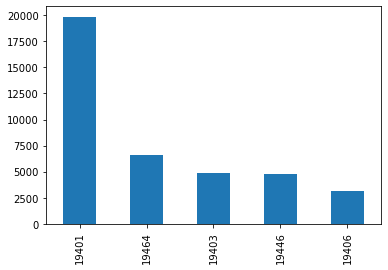

In [22]:
top = cal.zip.value_counts().head()
top.plot(kind='bar')

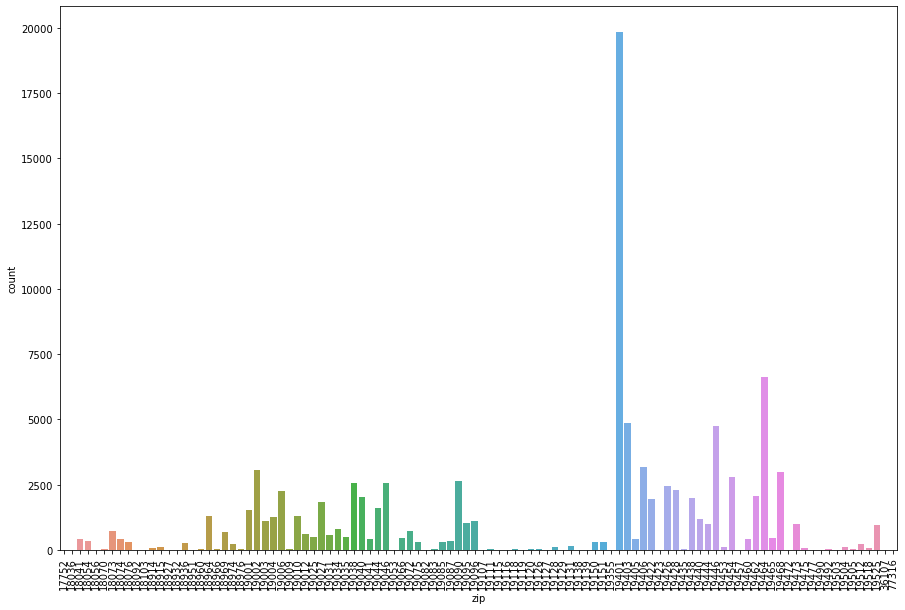

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='zip',data=cal)
plt.xticks(rotation=90)
plt.show()

#### What are the top 5 townships(twp) for 911 calls?

In [24]:
cal.twp.head()

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

#### How many unique title codes are there?

In [25]:
cal.title

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [26]:
cal.title[0]

'EMS: BACK PAINS/INJURY'

In [27]:
cal.title.str.split(':')

0             [EMS,  BACK PAINS/INJURY]
1            [EMS,  DIABETIC EMERGENCY]
2                [Fire,  GAS-ODOR/LEAK]
3             [EMS,  CARDIAC EMERGENCY]
4                     [EMS,  DIZZINESS]
                      ...              
99487    [Traffic,  VEHICLE ACCIDENT -]
99488    [Traffic,  VEHICLE ACCIDENT -]
99489               [EMS,  FALL VICTIM]
99490           [EMS,  NAUSEA/VOMITING]
99491    [Traffic,  VEHICLE ACCIDENT -]
Name: title, Length: 99492, dtype: object

### Creating New Features
    In the title column there are 'Reasons/Departments' specified before the title code. These are EMS, Fire, and Traffic.
    Use .apply() with a custom lambda expression to create a new column called 'Reason' that contains this string value.

In [28]:
# Select example
x = cal['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [29]:
x.split(':')[0]

'EMS'

In [30]:
# Create reason column
new_feature = cal.title.apply(lambda x:x.split(':')[0])
new_feature

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [31]:
cal['Reason'] = new_feature

In [32]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### What is the most common reason for a 911 call based off this new column?

In [33]:
cal.Reason

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [34]:
cal['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:ylabel='Reason'>

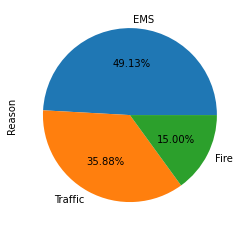

In [35]:
cal['Reason'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### From above graph, we can see, most calls are from EMS category and percentage is 49%. Out of total 3, summary is as follows: - EMS: 49% - Traffi: 36% - Fire: 15%

#### Use seaborn to create a countplot of 911 calls by Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

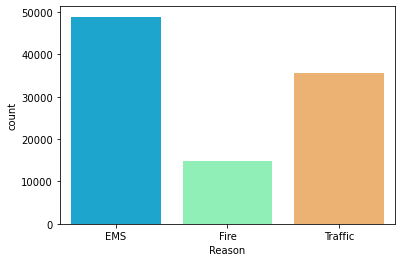

In [36]:
sns.countplot(x = 'Reason',data = cal, palette = 'rainbow')

#### What is the data type of the objects in the timeStamp column?

In [37]:
cal.timeStamp # combination of Date and time

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [38]:
type(cal['timeStamp'].iloc[0])

str

#### Convert timeStamp from strings to DateTime object

In [39]:
cal['timeStamp'] = pd.to_datetime(cal['timeStamp'])
type(cal['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
cal.timeStamp

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

#### Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. Create these columns based off of the timeStamp column.

In [41]:
time = cal['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [42]:
cal['timeStamp'].apply(lambda time : time.hour)

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int64

In [43]:
# Create hour column
cal['Hour'] = cal['timeStamp'].apply(lambda time : time.hour)
cal['Hour'].value_counts().head()

17    6517
16    6490
15    6154
12    6029
14    5997
Name: Hour, dtype: int64

In [44]:
# Create month column
cal['Month'] = cal['timeStamp'].apply(lambda time : time.month)
cal['Month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

In [45]:
cal['Month'].value_counts().sort_index()

1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: Month, dtype: int64

In [46]:
# Create day of week
cal['Day of Week'] = cal['timeStamp'].apply(lambda time : time.dayofweek)
cal['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

In [47]:
# Confirm columns were added to dataframe
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### Notice how the Day of Week is an integer 0-6. Use the .map() with a dictionary to map the actual string names to the day of the week

In [48]:
# Create dictionary
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [49]:
cal['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [50]:
# Map string names
cal['Day of Week'] = cal['Day of Week'].map(dmap)

In [51]:
cal['Day of Week'][:4]

0    Thu
1    Thu
2    Thu
3    Thu
Name: Day of Week, dtype: object

In [52]:
cal['Day of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

#### Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column 

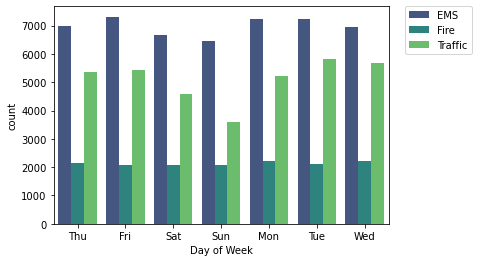

In [53]:
# Create count plot
sns.countplot(x = 'Day of Week', data = cal, hue = 'Reason',palette= 'viridis')

# Show edge lines
plt.rcParams["patch.force_edgecolor"] = True

# Relocate legend
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad= 0.)

#### Use seaborn to create a countplot of the Month column with the hue based off the Reason column

In [54]:
# cal.timeStamp.dt.hour
cal.timeStamp.dt.hour

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int64

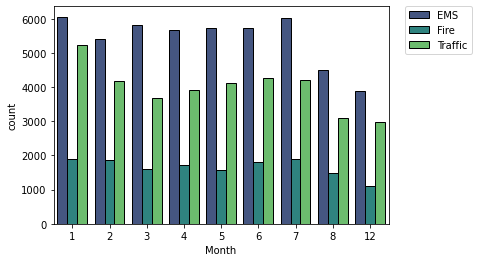

In [55]:
# Create count plot
sns.countplot(x = 'Month', data = cal, hue = 'Reason', palette = 'viridis')

# Relocate legend
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

#### Do you notice something strange about this Plot? ** Plot is missing some months. May need to plot this information another way, possibly a simple line plot, that fills in the missing data.

#### Create a groupby object called byMonth that groups the DataFrame by month and uses the count() method for aggregation.

In [56]:
cal.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969


In [57]:
# Create group by object
byMonth = cal.groupby('Month').count()

# View first few rows
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423


#### Create a simple plot off of the dataframe indicating the count of calls per month

<AxesSubplot:xlabel='Month'>

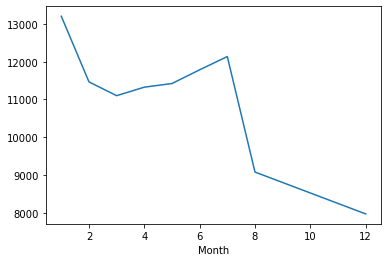

In [58]:
byMonth['lat'].plot()

#### Use seaborn lmplot() to create a linear fit on the number of calls per Month. Keep in mind you may need to reset the index to a column.

In [59]:
# Reset index to make month a column
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969


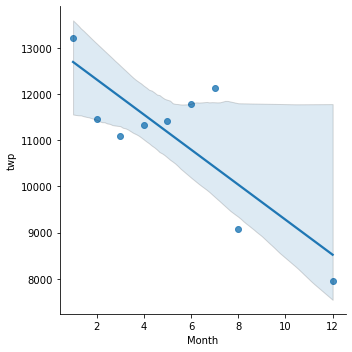

In [60]:
# Create linear model
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index()) 
# there was no 'Month' column in byMonth, need to reset the index for this code to work

#### Use apply along with the .date() method to create a new column called 'Date' that contains the date from the timeStamp column.

In [61]:
t = cal['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:40:00')

In [62]:
t.date()

datetime.date(2015, 12, 10)

In [63]:
cal['Date'] = cal['timeStamp'].apply(lambda t : t.date())
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


#### Grouby the Date column with the count() aggregate and create a plot of counts of 911 calls

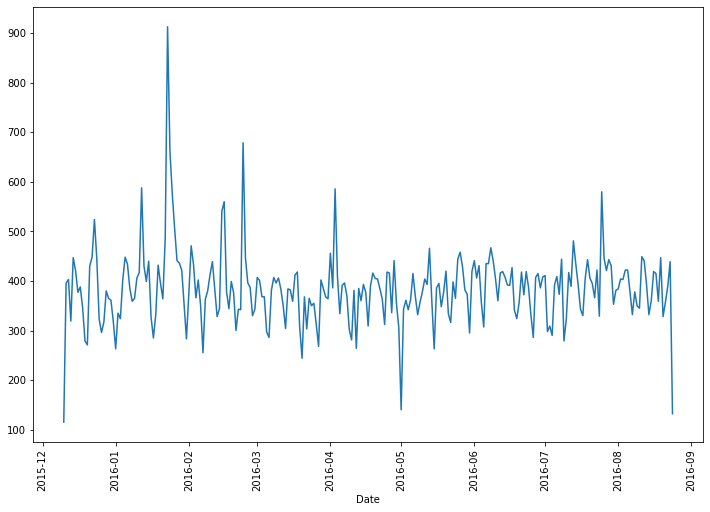

In [64]:
# Plot all instances per date
plt.figure(figsize=(12,8))
cal.groupby('Date').count()['lat'].plot()
plt.xticks(rotation='vertical')
plt.tight_layout
plt.savefig('graph_1.png',dpi=400)

In [65]:
cal.Date.nunique()

259

#### Recreate plot above but create 3 separate plots representing reason for the 911 Call

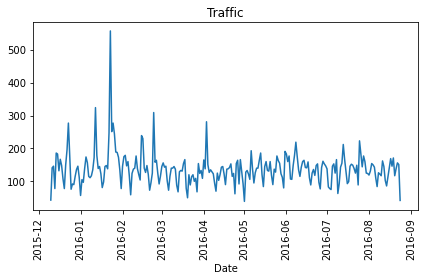

In [66]:
# Create Traffic plot
cal[cal['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

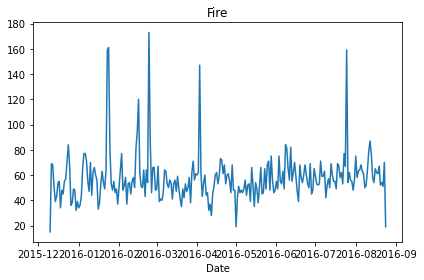

In [67]:
# Create Fire plot
cal[cal['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

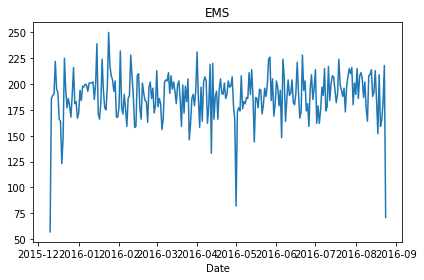

In [68]:
# Create EMS plot
cal[cal['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

## Heat Maps

#### By Day of Week

In [69]:
# Create multi-level index and unstack to re-structure dataframe as matrix
dayHour = cal.groupby(['Day of Week','Hour']).count()['Reason'].unstack() # columns become Hours and the Index becomes Day of the Week
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

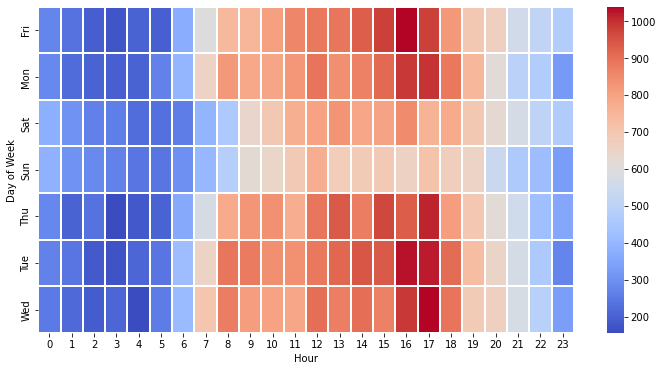

In [70]:
# Create heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap = 'coolwarm',linewidths=2)

#### Create Clustermap using this DataFrame

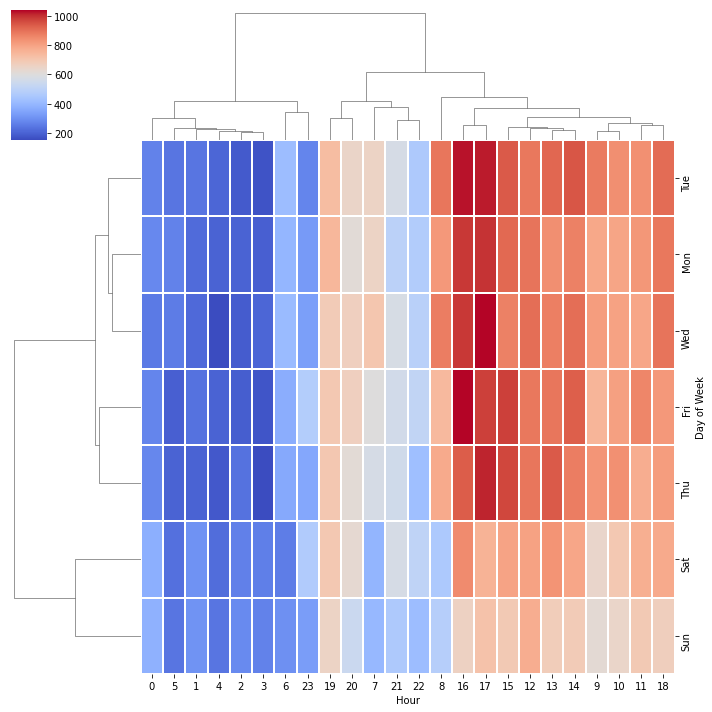

In [71]:
# Clustermap
sns.clustermap(dayHour,cmap = 'coolwarm',linewidths =2)

In [72]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [73]:
d = sns.load_dataset('diamonds')
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [74]:
d.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [75]:
d.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

<AxesSubplot:xlabel='cut', ylabel='count'>

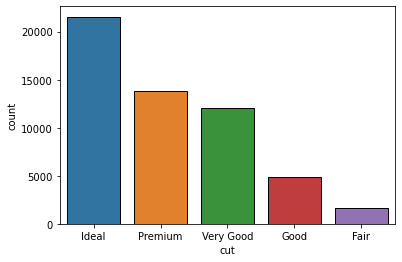

In [76]:
sns.countplot(x= 'cut',data=d)

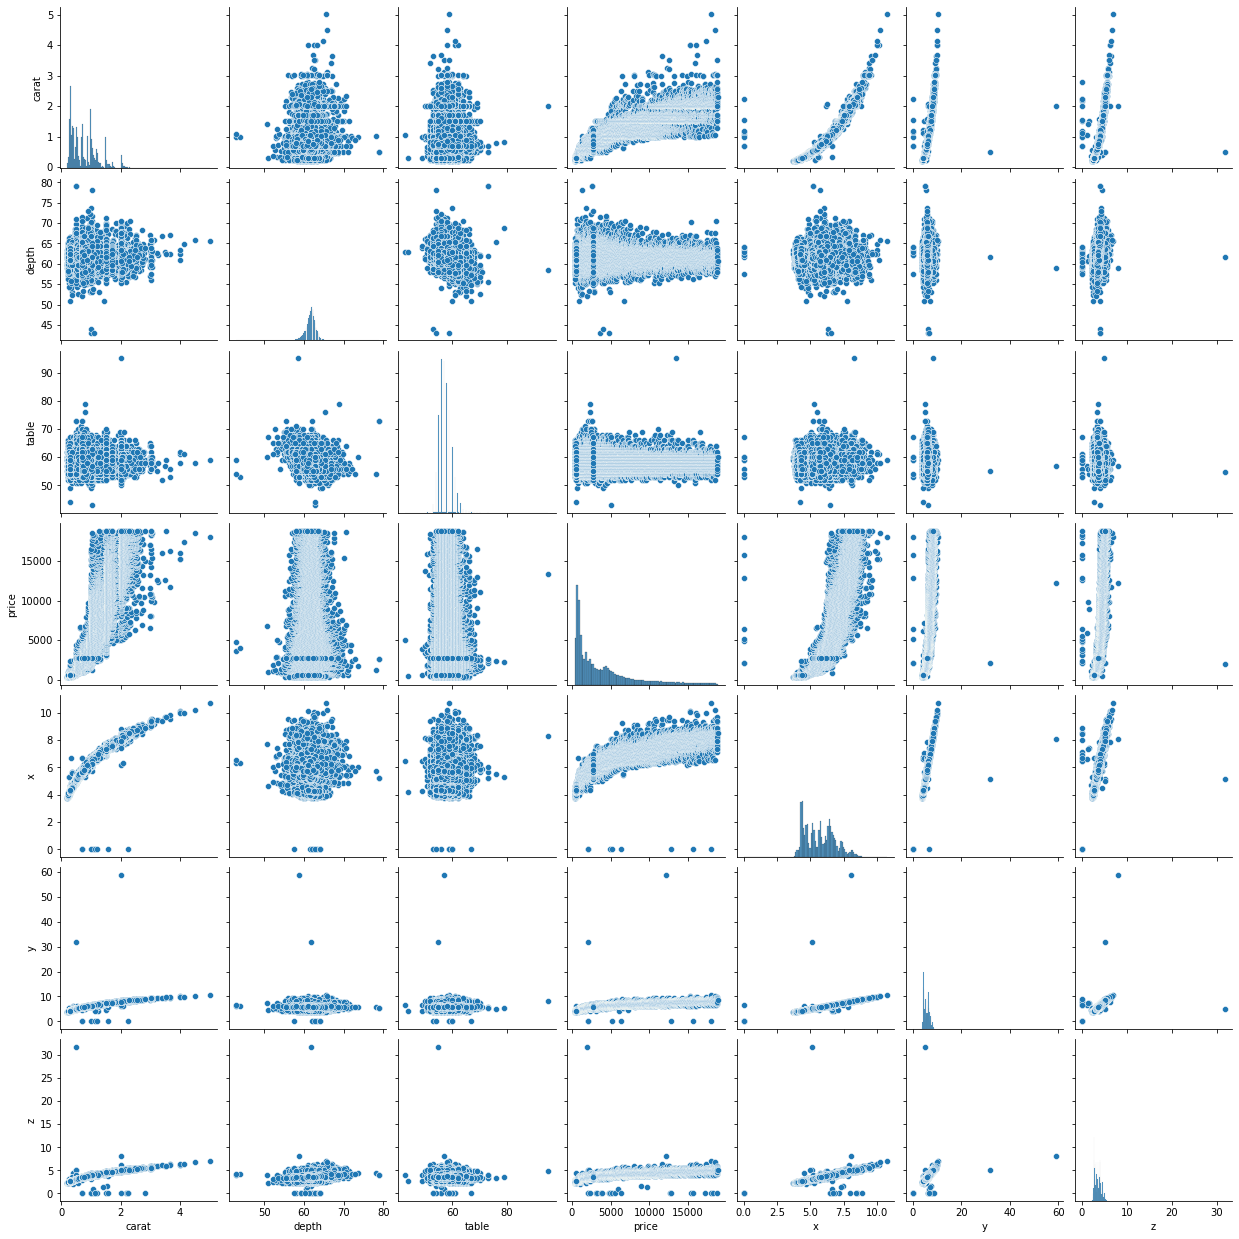

In [77]:
sns.pairplot(d)

In [78]:
d.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

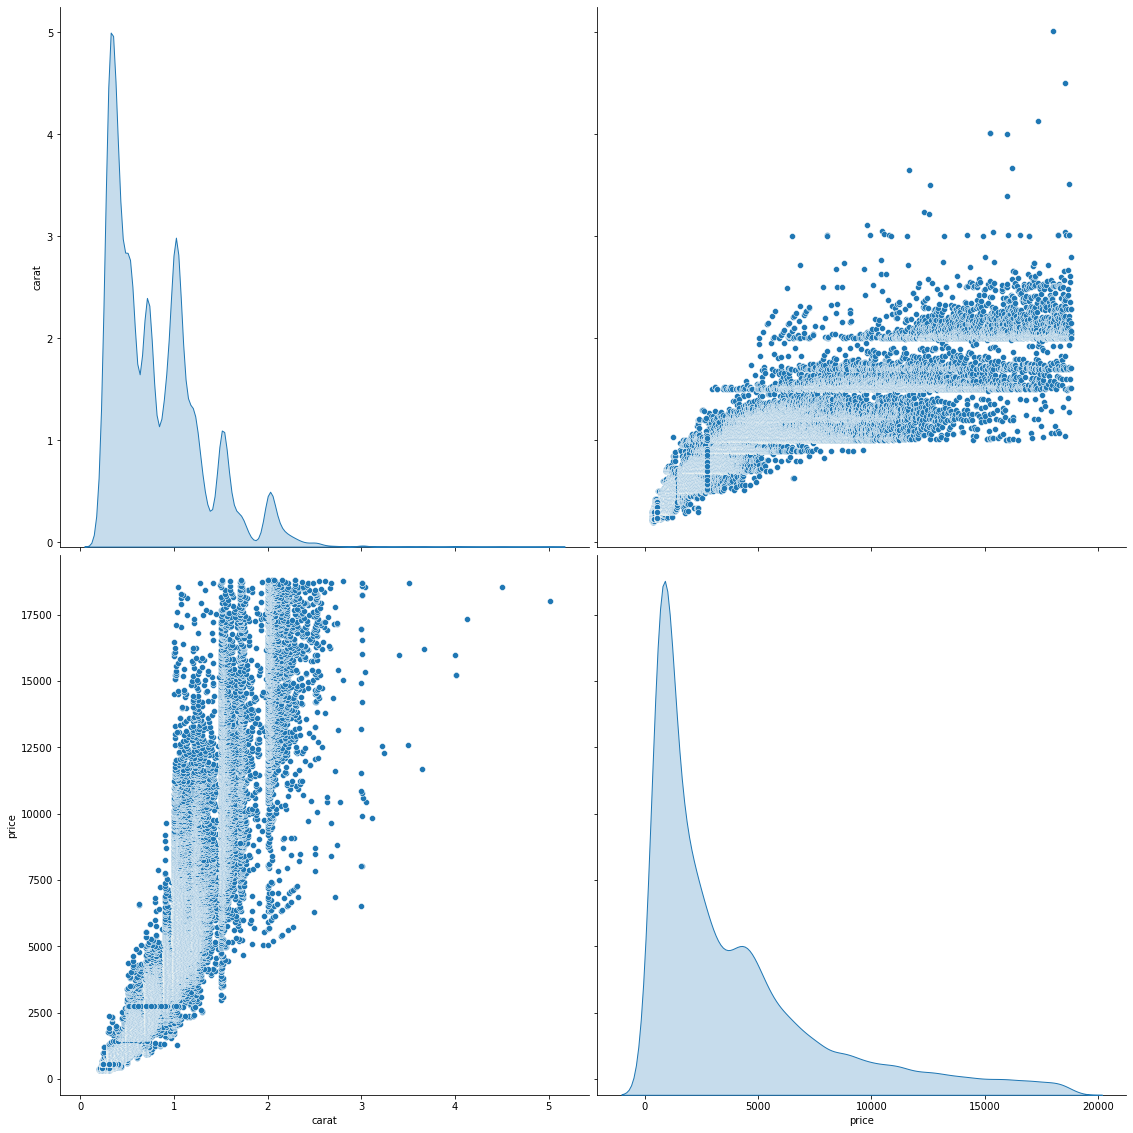

In [80]:
sns.pairplot(d[['carat', 'cut', 'color','price']],height=8,diag_kind='kde')

### Discussion and findings:
    - Most of the calls are for the reason of EMS followed by Traffic.
    - January and December are the most emergency charged months of the year. Moreover, the reason for call is mainly EMS and Traffic Emergencies.
    - The reporting of EMS across the hours of the day mainly spikes during working hours.
    - Friday is the most day of the week with calls reporting EMS and Traffic Emergencies.
    - The late hours of the night has the least emergency calls However on the weekends, there is a more emergency calls after midnight.